In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import power_transform
from sklearn.ensemble import IsolationForest
from sklearn.cluster import AgglomerativeClustering

In [2]:
data=pd.read_csv('CC GENERAL.csv')

In [3]:
data.set_index(['CUST_ID'],inplace=True,drop=True)

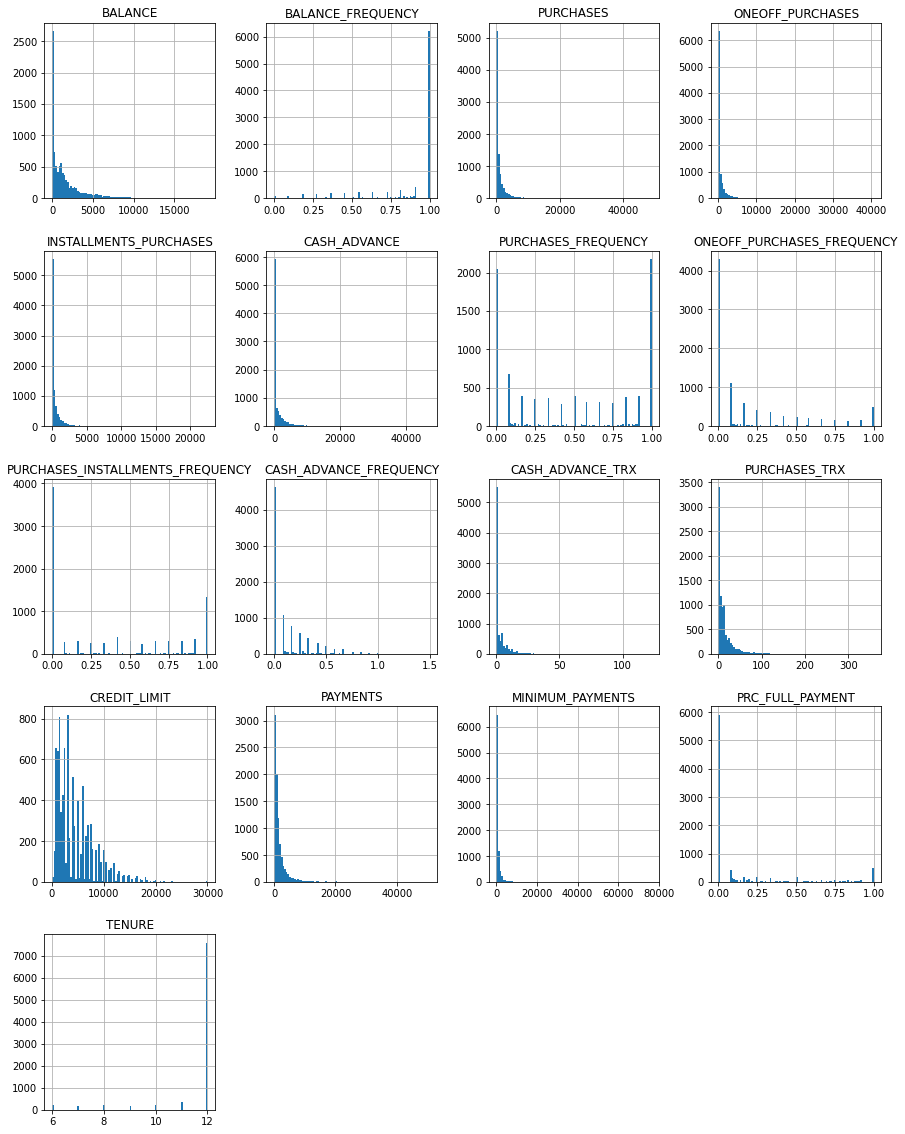

In [4]:
data.hist(bins=int(np.sqrt(len(data))),figsize=(15,20));

# Impute_missing

In [5]:
#data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)
#data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [6]:

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)
After_imputation = imputer.fit_transform(data)

In [7]:
data=pd.DataFrame(After_imputation,columns=data.columns)

# Outliers

In [8]:
data=pd.DataFrame(np.log1p(data))

# Scaling

In [9]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
scale=MinMaxScaler()
data_scaled=scale.fit_transform(data)

In [10]:
data=pd.DataFrame(data_scaled,columns=data.columns)

# PCA

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca_data=pd.DataFrame(pca.fit_transform(data))


In [12]:
pca_data

,0,1,2,3,4,5
0,-0.293810,-0.521381,-0.218979,-0.305604,-0.074183,-0.023494
1,-1.058781,0.052801,0.230008,0.323586,-0.247744,-0.039086
2,0.351054,0.660616,-0.699561,-0.213495,-0.096663,0.236582
3,-0.542070,0.246345,-0.402954,-0.218190,0.196711,-0.198102
4,-0.562084,-0.150848,-0.421509,-0.300628,-0.273764,0.172999
...,...,...,...,...,...,...
8945,0.638132,-0.746560,0.182698,0.308472,0.491617,0.790771
8946,0.547653,-0.622087,0.285075,-0.208897,0.632059,0.753361
8947,0.407368,-0.722095,0.103732,0.072513,0.617384,0.722415
8948,-0.929405,-0.524748,-0.211926,0.298879,0.587089,0.686119


# KPCA

In [13]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=6, kernel='rbf')
data_with_kpca =pd.DataFrame(transformer.fit_transform(data),index=data.index)

In [14]:
data_with_kpca

,0,1,2,3,4,5
0,-0.093302,-0.168549,-0.083117,-0.105751,-0.015694,-0.017859
1,-0.338115,0.011546,0.080481,0.100636,-0.077537,-0.020195
2,0.109622,0.219800,-0.218687,-0.056500,-0.039543,0.084678
3,-0.171755,0.079166,-0.128011,-0.071013,0.072970,-0.058300
4,-0.183146,-0.046316,-0.141111,-0.101189,-0.090358,0.040110
...,...,...,...,...,...,...
8945,0.199366,-0.231423,0.049396,0.104599,0.122633,0.258488
8946,0.173278,-0.194429,0.080060,-0.056084,0.168597,0.260341
8947,0.131813,-0.225902,0.023698,0.028940,0.168494,0.249441
8948,-0.277707,-0.151707,-0.065409,0.099549,0.167153,0.233777


# TSNE

In [15]:
tsne_with_data = TSNE(n_components=2,n_jobs=-1,perplexity=30,random_state=1,n_iter=300,verbose=0)
tsne_res_pca=tsne_with_data.fit_transform(pca_data)

C:\Users\Honda\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Honda\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


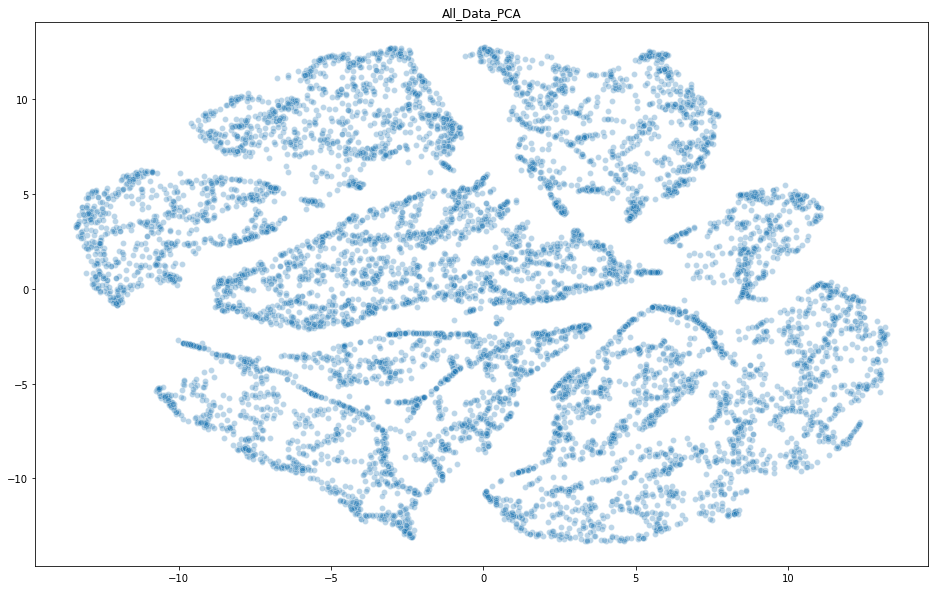

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_res_pca[:,0], y=tsne_res_pca[:,1],
    palette=sns.color_palette("hls", 1),
    legend="full",
    data=pca_data,
    alpha=0.3
).set(title='All_Data_PCA');

In [17]:
tsne_with_data = TSNE(n_components=2,n_jobs=-1,perplexity=30,random_state=1,n_iter=300,verbose=0)
tsne_res_kpca=tsne_with_data.fit_transform(data_with_kpca)

C:\Users\Honda\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Honda\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


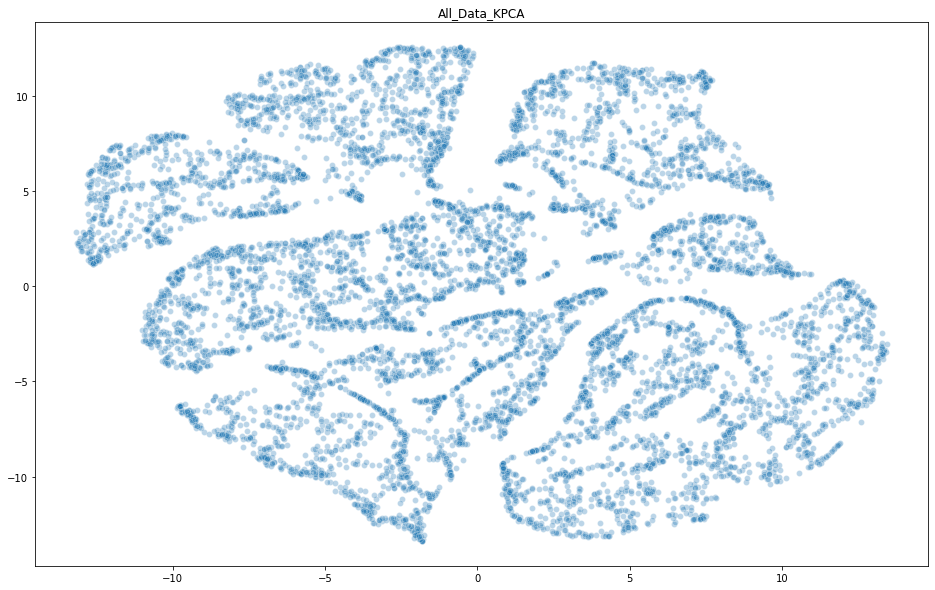

In [18]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_res_kpca[:,0], y=tsne_res_kpca[:,1],
    palette=sns.color_palette("hls", 1),
    legend="full",
    data=data_with_kpca,
    alpha=0.3
).set(title='All_Data_KPCA');

# PCA+Clustering

# Kmeans

In [19]:
from sklearn.cluster import KMeans
kmeans_obj= KMeans(n_clusters=4,random_state=22)
kmeans_out=kmeans_obj.fit_transform(pca_data)
kmeans_out

array([[1.01242153, 0.73648174, 1.47924966, 0.96726336],
       [0.36451914, 1.27702266, 1.92716558, 1.70948737],
       [1.7146381 , 0.82523329, 1.00243486, 1.50167036],
       ...,
       [1.83751841, 1.4958238 , 1.51879592, 0.98221418],
       [1.15489515, 1.43157223, 2.18602275, 1.77203042],
       [1.67190008, 1.20878588, 1.4790552 , 1.75183361]])

In [20]:
labels_kmeans=kmeans_obj.labels_
np.unique(labels_kmeans)

array([0, 1, 2, 3])

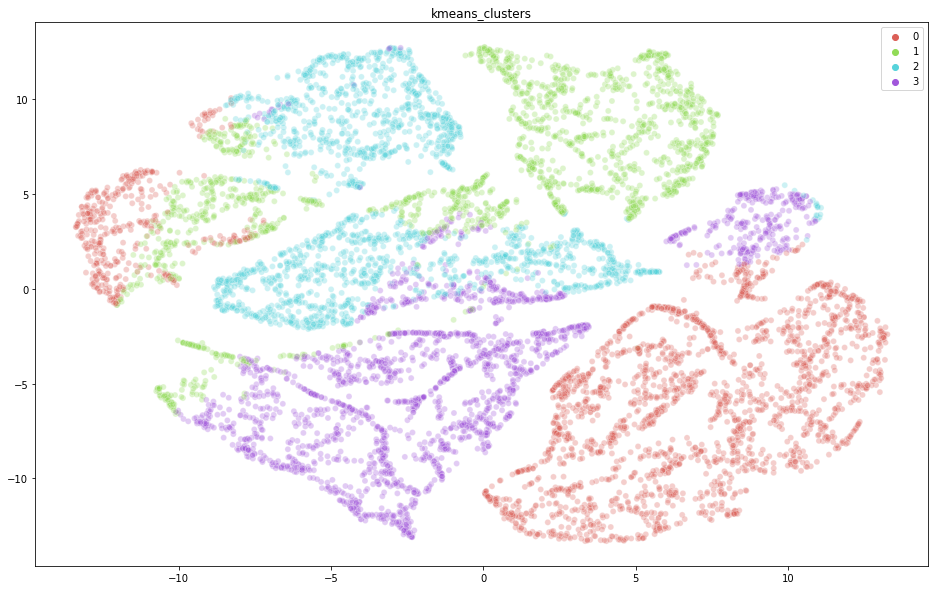

In [21]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_res_pca[:,0], y=tsne_res_pca[:,1],
    palette=sns.color_palette("hls", 4),
    
    hue=labels_kmeans,
    legend="full",
    alpha=0.3
).set(title='kmeans_clusters');

In [23]:
score = silhouette_score(pca_data, labels_kmeans, metric='euclidean')
score

0.31898359169698176

# Hierarchical Cluster

In [24]:
clustering = AgglomerativeClustering(n_clusters=4).fit(pca_data)

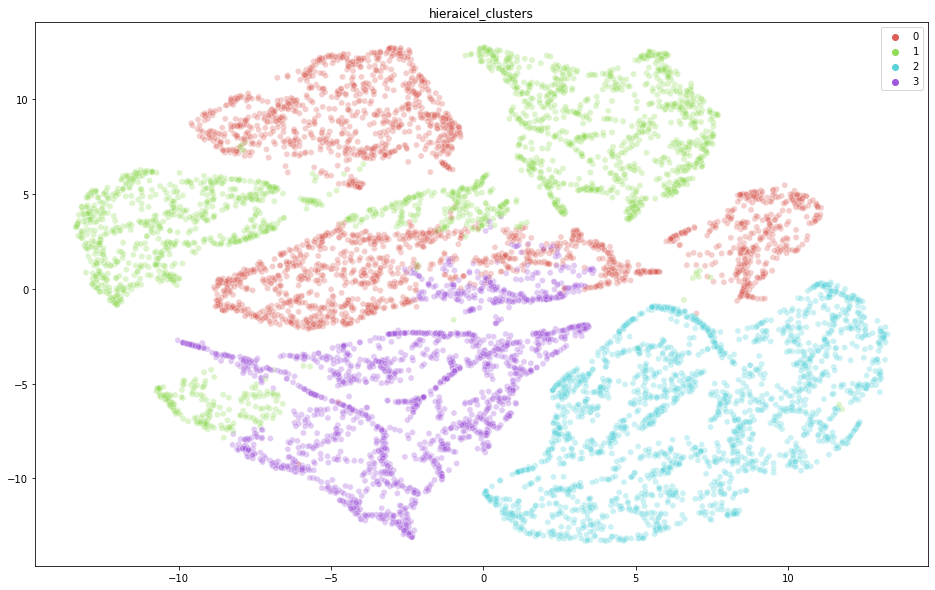

In [25]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_res_pca[:,0], y=tsne_res_pca[:,1],
    palette=sns.color_palette("hls", 4),
    hue=clustering.labels_,
    legend="full",
    alpha=0.3
).set(title='hieraicel_clusters');

In [26]:
score = silhouette_score(pca_data, clustering.labels_, metric='euclidean')
score

0.2751240901714905

# KPCA+Clustering

# Kmeans

In [27]:
from sklearn.cluster import KMeans
kmeans_obj= KMeans(n_clusters=4,random_state=22)
kmeans_out=kmeans_obj.fit_transform(data_with_kpca)
kmeans_out

array([[0.22625648, 0.32026456, 0.3322919 , 0.47462993],
       [0.41545955, 0.55250514, 0.11431039, 0.60430534],
       [0.27804743, 0.48384951, 0.54614486, 0.313128  ],
       ...,
       [0.47385355, 0.31190019, 0.58109814, 0.48168348],
       [0.44146885, 0.5558381 , 0.36043365, 0.66801912],
       [0.38773707, 0.553551  , 0.52582981, 0.45534758]])

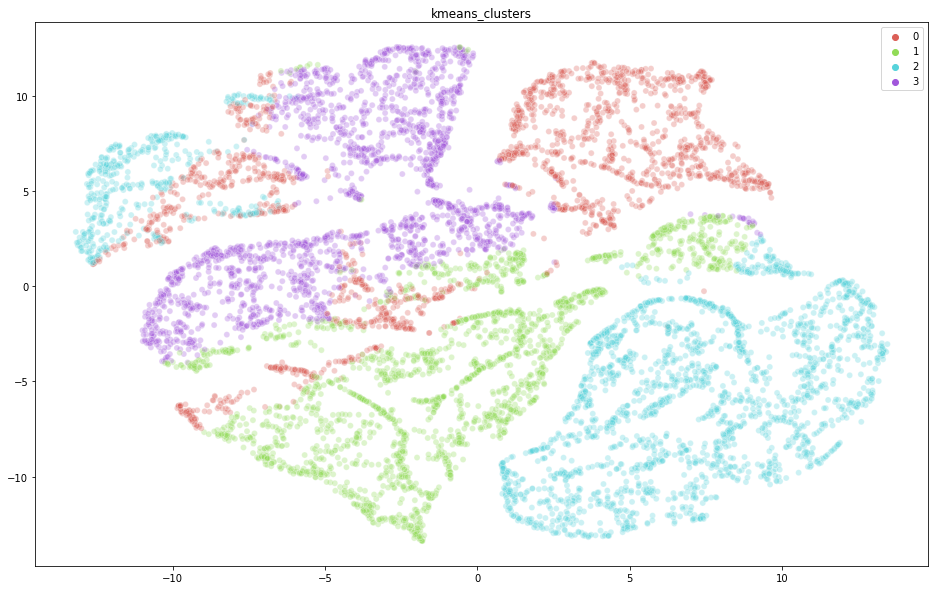

In [28]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_res_kpca[:,0], y=tsne_res_kpca[:,1],
    palette=sns.color_palette("hls", 4),
    hue=kmeans_obj.labels_,
    legend="full",
    alpha=0.3
).set(title='kmeans_clusters');

In [29]:
score = silhouette_score(data_with_kpca,kmeans_obj.labels_ , metric='euclidean')
score

0.3242729795831148

# Hierarchical Cluster

In [44]:
clustering = AgglomerativeClustering(n_clusters=4).fit(data_with_kpca)

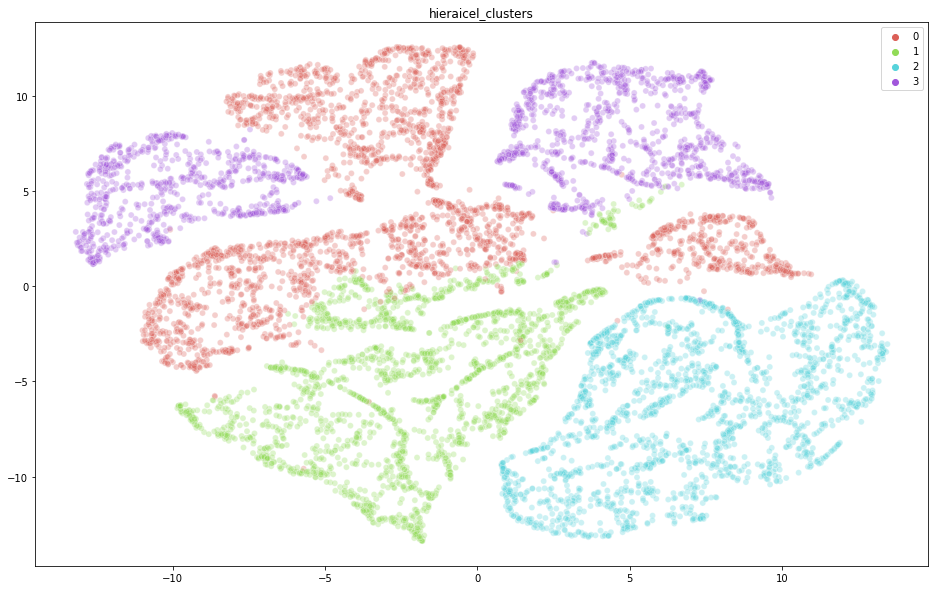

In [45]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_res_kpca[:,0], y=tsne_res_kpca[:,1],
    palette=sns.color_palette("hls", 4),
    hue=clustering.labels_,
    legend="full",
    alpha=0.3
).set(title='hieraicel_clusters');

In [30]:
score = silhouette_score(data_with_kpca,clustering.labels_, metric='euclidean')
score

0.27939062400289677

# Comments:

Kernel PCA is better than PCA as we got higher silhoutte score using it than PCA